In [1]:
import torch
import torch.nn as nn
from scratch_model import VisionTransformer

In [2]:
#check if we can run this code with GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [3]:
from train_utils import save_model, save_plots, train, validate, get_n_params

In [4]:
model_config = {
    "img_size": 32,
    "patch_size": 4,
    "in_chans": 3,
    "n_classes": 10,
    "embed_dim": 256,
    "depth": 12,
    "n_heads": 8,
    "mlp_ratio": 4.,
    "qkv_bias": True,}

In [5]:
model = VisionTransformer(**model_config).to(device)
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=256, out_features=768, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=256, out_features=256, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (norm2): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
      (mlp): MLP(
        (fc1): Linear(in_features=256, out_features=1024, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1024, out_features=256, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((256,), eps=1e-06, elementwise_affine=True)
  (head): Linear(in_features=256, out_features=10, bias=True

In [6]:
get_n_params(model)

9509642

In [7]:
import pickle
from torchvision.transforms import transforms
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [8]:
#import train data
with open('imbalanced_data.pkl', 'rb') as f:
    imbalanced_data = pickle.load(f)

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.49139968, 0.48215841, 0.44653091], [0.26733429, 0.25643846, 0.27615047])
                                ])

train_data = [(transform(image), label) for image, label in imbalanced_data]

trainsize = int(len(imbalanced_data)*0.8)
train_set, val_set = torch.utils.data.random_split(train_data, [trainsize, 45500 - trainsize])

i = 0
j = []
for k in range(10) :
    for image ,label in val_set :
        if label == k :
            i = i + 1
    j.append(i)
    i = 0
print("différents nombres de labels selon chaque classe dans le validation set :", j)

différents nombres de labels selon chaque classe dans le validation set : [974, 982, 997, 99, 952, 1014, 1040, 1023, 999, 1020]


In [10]:
EPOCHS = 15
BATCH_SIZE = 128
LR = 3e-4

In [11]:
from train_utils import weight_classes, weight_calculation

In [12]:
labels = []
for image, label in train_set :
    labels.append(label)

labels_unique = np.unique(labels)

weight_params = weight_classes(labels_unique, labels)

In [13]:
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor(weight_params).to(device))
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

loader_kwargs = ({'num_workers' : 4, 'pin_memory': True} if torch.cuda.is_available() == True else {})
train_loader = data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, **loader_kwargs)
val_loader = data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, drop_last=False, **loader_kwargs)

In [14]:
from save_best_model import SaveBestModel
save_best_model = SaveBestModel()

[INFO]: Epoch 1 of 15
Training


100%|██████████| 284/284 [00:53<00:00,  5.31it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 21.55it/s]


Training loss: 1.867, training acc: 31.893
Validation loss: 1.693, validation acc: 37.308

Best validation loss: 1.6928567422760858

Saving best model for epoch: 1

--------------------------------------------------
[INFO]: Epoch 2 of 15
Training


100%|██████████| 284/284 [00:35<00:00,  8.11it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.59it/s]


Training loss: 1.544, training acc: 45.093
Validation loss: 1.395, validation acc: 47.582

Best validation loss: 1.3948690874709024

Saving best model for epoch: 2

--------------------------------------------------
[INFO]: Epoch 3 of 15
Training


100%|██████████| 284/284 [00:33<00:00,  8.38it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.15it/s]


Training loss: 1.357, training acc: 52.481
Validation loss: 1.329, validation acc: 55.824

Best validation loss: 1.328943724433581

Saving best model for epoch: 3

--------------------------------------------------
[INFO]: Epoch 4 of 15
Training


100%|██████████| 284/284 [00:33<00:00,  8.50it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.72it/s]


Training loss: 1.238, training acc: 56.810
Validation loss: 1.259, validation acc: 54.396

Best validation loss: 1.2594727691676881

Saving best model for epoch: 4

--------------------------------------------------
[INFO]: Epoch 5 of 15
Training


100%|██████████| 284/284 [00:34<00:00,  8.23it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 21.07it/s]


Training loss: 1.140, training acc: 59.964
Validation loss: 1.205, validation acc: 56.330

Best validation loss: 1.2050188465250864

Saving best model for epoch: 5

--------------------------------------------------
[INFO]: Epoch 6 of 15
Training


100%|██████████| 284/284 [00:34<00:00,  8.26it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.09it/s]


Training loss: 1.067, training acc: 62.324
Validation loss: 1.198, validation acc: 59.582

Best validation loss: 1.1983366534113884

Saving best model for epoch: 6

--------------------------------------------------
[INFO]: Epoch 7 of 15
Training


100%|██████████| 284/284 [00:33<00:00,  8.36it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.16it/s]


Training loss: 1.009, training acc: 64.404
Validation loss: 1.251, validation acc: 54.604
--------------------------------------------------
[INFO]: Epoch 8 of 15
Training


100%|██████████| 284/284 [00:34<00:00,  8.25it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.95it/s]


Training loss: 0.935, training acc: 66.354
Validation loss: 1.201, validation acc: 61.033
--------------------------------------------------
[INFO]: Epoch 9 of 15
Training


100%|██████████| 284/284 [00:34<00:00,  8.34it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.23it/s]


Training loss: 0.886, training acc: 67.896
Validation loss: 1.259, validation acc: 60.846
--------------------------------------------------
[INFO]: Epoch 10 of 15
Training


100%|██████████| 284/284 [00:34<00:00,  8.33it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.97it/s]


Training loss: 0.826, training acc: 69.981
Validation loss: 1.166, validation acc: 59.549

Best validation loss: 1.1655355824364557

Saving best model for epoch: 10

--------------------------------------------------
[INFO]: Epoch 11 of 15
Training


100%|██████████| 284/284 [00:32<00:00,  8.62it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 20.03it/s]


Training loss: 0.780, training acc: 71.371
Validation loss: 1.220, validation acc: 64.297
--------------------------------------------------
[INFO]: Epoch 12 of 15
Training


100%|██████████| 284/284 [00:33<00:00,  8.40it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.80it/s]


Training loss: 0.707, training acc: 73.698
Validation loss: 1.240, validation acc: 62.352
--------------------------------------------------
[INFO]: Epoch 13 of 15
Training


100%|██████████| 284/284 [00:33<00:00,  8.57it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.89it/s]


Training loss: 0.700, training acc: 74.041
Validation loss: 1.269, validation acc: 65.000
--------------------------------------------------
[INFO]: Epoch 14 of 15
Training


100%|██████████| 284/284 [00:34<00:00,  8.23it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 18.70it/s]


Training loss: 0.616, training acc: 77.033
Validation loss: 1.256, validation acc: 64.692
--------------------------------------------------
[INFO]: Epoch 15 of 15
Training


100%|██████████| 284/284 [00:34<00:00,  8.12it/s]


Validation


100%|██████████| 72/72 [00:03<00:00, 19.89it/s]


Training loss: 0.571, training acc: 78.755
Validation loss: 1.325, validation acc: 65.385
--------------------------------------------------
Saving final model...
TRAINING COMPLETE


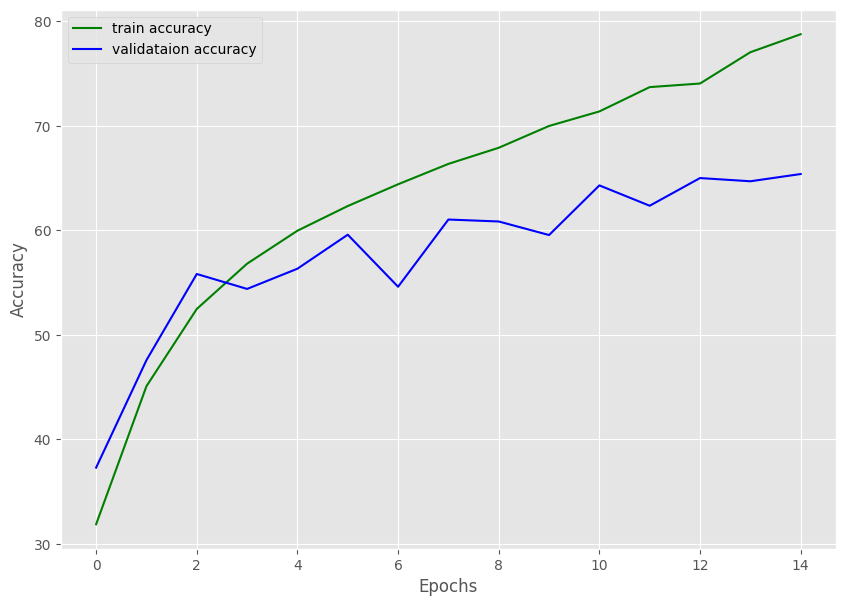

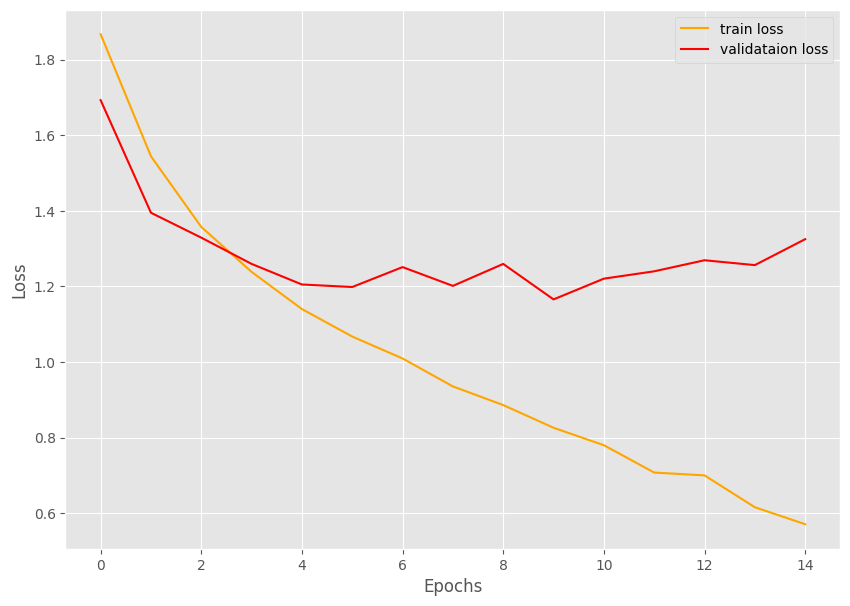

In [15]:
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(EPOCHS):
    print(f"[INFO]: Epoch {epoch+1} of {EPOCHS}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                            optimizer, loss_fn)
    valid_epoch_loss, valid_epoch_acc = validate(model, val_loader,  
                                                loss_fn)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    # save the best model till now if we have the least loss in the current epoch
    save_best_model(
        valid_epoch_loss, epoch, model, optimizer, loss_fn, './models/weight_best_model.pth'
    )
    print('-'*50)
    
# save the trained model weights for a final time
save_model(EPOCHS, model, optimizer, loss_fn, './models/weight_final_model.pth')
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss, './models/images/weight_')
print('TRAINING COMPLETE')

In [16]:
checkpoint = torch.load('./models/weight_best_model.pth')

model = VisionTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss_fn = checkpoint['loss']

In [17]:
prediction = []
with torch.no_grad():
    for _,label in val_loader :
        image = _.to(device)
        pred = model(image)
        prediction.append(pred.cpu())

predicted_labels = []
for i in prediction:
    for j in i :
        predicted_labels.append(np.argmax(j.numpy()))

val_labels = []
for k,i in val_set :
    val_labels.append(i)

In [18]:
val, tot = 0, 0
for i in range(len(val_labels)):
    if val_labels[i] == predicted_labels[i]:
        val += 1
    tot +=1
print(f"Précision totale sur le set de validation: {val/tot:.2f}")

valm, totm = 0, 0
liste = []
for i in range(len(val_labels)):
    if val_labels[i] == 3:
        liste.append([predicted_labels[i]])
        if val_labels[i] == predicted_labels[i] :
            valm += 1
        totm +=1
print(f"Précision sur la classe minoritaire du set de validation: {valm/totm:.2f}")

Précision totale sur le set de validation: 0.60
Précision sur la classe minoritaire du set de validation: 0.51
